In [1]:
import os
import sys
import numpy as np

module_path = os.path.abspath('..')
if module_path not in sys.path:
    sys.path.append(module_path)
    
from gillespie import stochastic_sim, configuration,likelihood
from matplotlib import pyplot as plt

In [2]:
configuration.get('../configuration.toml');

In [3]:
signal_network, response_network = configuration.read_reactions()

In [4]:
def sim_signal(num_s):
    length = 200
    timestamps = np.zeros((num_s, length))
    trajectory = np.full((num_s, 1, length), 50, dtype=np.int16)
    reaction_events = np.zeros((num_s, length), dtype=np.int8)

    for s in range(num_s):
        stochastic_sim.simulate_one(timestamps[s], trajectory[s], reaction_events[s], signal_network)
    return timestamps, trajectory, reaction_events

In [5]:
sigs_t, sigs_c, _ = sim_signal(500)

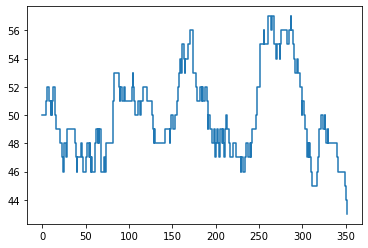

In [6]:
plt.plot(sigs_t[0], sigs_c[0,0], drawstyle='steps-post')

In [7]:
def sim_response(sig_t, sig_c):
    length = 400
    rtimestamps = np.zeros(length)
    rtrajectory = np.full((1, length), 50, dtype=np.int16)
    rreaction_events = np.zeros(length-1, dtype=np.int8)

    stochastic_sim.simulate_one(rtimestamps, rtrajectory, rreaction_events, response_network, sig_t[0], sig_c[0])
    return rtimestamps, rtrajectory, rreaction_events

In [8]:
sig_t, sig_c, _ = sim_signal(1)
res_t, res_c, r_events = sim_response(sig_t, sig_c)

In [9]:
sig_t.shape, sig_c.shape, res_t.shape, res_c.shape, r_events.shape

((1, 200), (1, 1, 200), (400,), (1, 400), (399,))

In [10]:
lhds = []
lengths = np.linspace(0,300,500)
for c, t in zip(sigs_c, sigs_t):
    l = likelihood.log_likelihood(lengths, c, t, res_c, res_t, r_events, response_network, dtype=np.double)
    lhds.append(l)
avrg_lh = likelihood.log_averaged_likelihood(lengths, sigs_c, sigs_t, res_c, res_t, r_events, response_network, np.zeros((1,500)), dtype=np.double)
lthis = likelihood.log_likelihood(lengths, sig_c, sig_t, res_c, res_t, r_events, response_network, dtype=np.double)

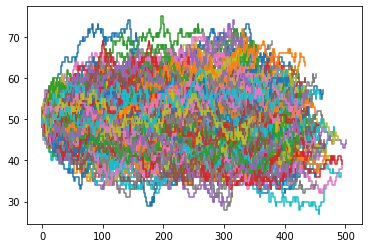

In [11]:
for t, c in zip(sigs_t, sigs_c):
    plt.plot(t, c[0], drawstyle='steps-post')

In [35]:
np.argmax(lhds, axis=0)

array([[411, 333, 411, 411, 411, 268, 268, 268, 268, 268, 268, 268, 268,
        268, 268, 236, 236, 288, 288, 288, 184, 184,  33, 268, 268, 268,
         33, 268, 268, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184,
        407, 467, 467, 407, 407, 467, 467, 467, 467, 467, 467, 467, 467,
        467,  10,  10,  10,  10,  10,  10,  35,  38,  38,  38, 202, 202,
          3,   3,   3,   3,   3,   3,  38,  38,  38,  38,  38,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   3, 361, 361, 361, 361, 184,
        184, 184, 184, 184, 184, 184, 184, 184,   3, 361, 361,  38,  38,
         38,  38,  38,  38, 361,  38,  38, 361, 361, 361, 361, 361, 361,
        361, 377, 206, 377, 377, 377, 377, 377, 377, 377, 206, 206, 206,
        206, 206, 377, 377, 377, 377, 206, 377, 377, 206, 206, 206, 206,
        206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 100, 100, 100,
        206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206,
          1,   1,   1,   1,   1,   1,   1,   1,   1

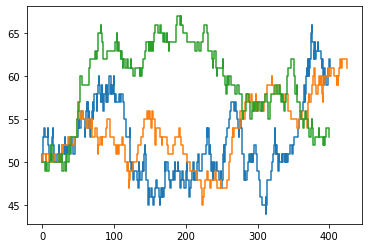

In [37]:
plt.plot(res_t, res_c[0], drawstyle='steps-post')
plt.plot(sig_t[0], sig_c[0,0], drawstyle='steps-post');
plt.plot(sigs_t[206], sigs_c[206,0], drawstyle='steps-post');

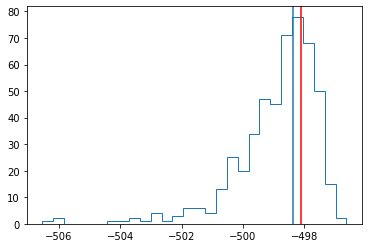

In [82]:
idx = 499
plt.hist([l[0,idx] for l in lhds], bins='auto', histtype='step')
plt.axvline(x=avrg_lh[0,idx])
plt.axvline(x=lthis[0,idx], color='red')

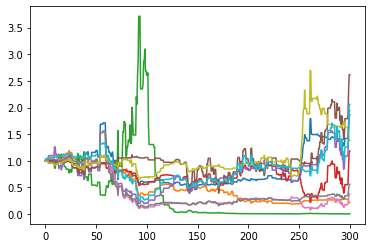

In [34]:
for l in lhds[::50]:
    plt.plot(lengths, np.exp(l[0]-lthis[0]))

In [191]:

length = 1000000
rtimestamps = np.zeros(length)
rtrajectory = np.full((1, length), 1000, dtype=np.int16)
rreaction_events = np.zeros(length, dtype=np.int8)

stochastic_sim.simulate_one(rtimestamps, rtrajectory, rreaction_events, response_network, timestamps, trajectory)

In [192]:
components = np.array([4000, 1000])
stochastic_sim.simulate_until_one(2500.0, components, response_network, timestamps, trajectory)

(2499.9516078497004, array([4642, 1184]))

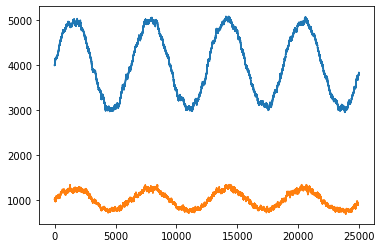

In [193]:
plt.plot(timestamps, trajectory[0], drawstyle='steps-post');
plt.plot(rtimestamps, rtrajectory[0], drawstyle='steps-post');

In [195]:
np.int16(np.sin(timestamps/1000) * 1000)

array([   0,    0,    0, ..., -172, -172, -172], dtype=int16)